# The Last Glacial Maximum, ice sheet flow, directional data, and bootstrapping

## The Last Glacial Maximum

Around 20,000 years ago was the last glacial maximum, the most recent of glacial intervals associated with climate going between a glacial and interglacial climate states over the past 2.5 million years. We will look at data associated with more of these cycles when we talk about time-series analysis. For the moment, let's focus on the warming from the last glacial maximum which is visualized (based on estimates published in a couple different scientific papers) in the following xkcd comic:

<img src="./images/earth_temperature_timeline_2x.png" width = 600>

At the last glacial maximum, the extent of ice sheets on North America were the following such that nearly all of Canada was covered in an ice sheet (like Greenland is today) with this ice sheet extending down into the lower 48 states of the present-day United States:

<img src="./images/Cordilleran-and-Laurentide-Ice-Sheets.png" width = 600>

> Source https://opentextbc.ca/geology/chapter/16-1-glacial-periods-in-earths-history/

This xkcd comic is a helpful visualization of the thickness of the Laurentide ice sheet at the location of a few modern day cities:

<img src="./images/ice_sheets_2x.png" width = 600>

## The Cordilleran ice sheet

Let's focus on the Cordilleran ice sheet which is visualized here:

<img src="./images/Cordilleran_ice_sheet.png" width = 500>

> Source Booth et al. 2003 where it is modified from Clague (1981)

Booth et al. (2003) in their review paper on the Cordilleran ice sheet provide this summary of the history of the most recent growth of the ice sheet.

> The Cordilleran ice sheet most recently advanced out of the mountains of British Columbia about 25,000 14C yr B.P. It flowed west onto the continental shelf, east into the intermontaine valleys of British Columbia where it probably merged with the western edge of the Laurentide ice sheet, and south into the lowlands of Washington State (Fig. 8, Table 1). In southern British Columbia and western Washington the Puget lobe filled the Fraser Lowland and the Puget Lowland between the Olympic Mountains and Cascade Range. The Juan de Fuca lobe extended east along the Strait of Juan de Fuca to termine some 100km west of Washington’s present coast. Several ice lobes east of the Cascade Range expanded south down the Okanogan Valley and down other valleys farther east. The Fraser-age ice-sheet maximum on both sides of the Cascade Range was broadly synchronous (Waitt & Thorson, 1983). It approximately coincided with the maximum advance of some parts of the Laurentide ice sheet in central North America at about 14,000 14C yr B.P. but lagged several thousand years behind the culminating advance of the most of the Laurentide ice sheet (Lowell et al., 1999; Mickelson et al., 1983; Prest, 1969). *The cordilleran ice sheet, Booth et al. 2003

There are a lot of different statements made in the above summary paragraph that come from a lot of different data types. For today, let's focus on the statements regarding the flow direction.

This photograph of the Aletsch Glacier in Switzerland provides a striking visualization of ice flow in a modern glacier as detritus associated with rock falls onto the glacier have been stretched out in the direction of ice flow:

<img src="./images/glacier.png" width = 500>

> The Aletsch Glacier, the largest glacier of the Alps, in Switzerland. Source: By Dirk Beyer - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=352940

## Ice-flow indicator compilation, British Columbia and Yukon

The data set we will focus on today is a large compilation of indicators of past ice-flow that was published by the British Columbia Geological Survey.

> Publication Information:
*Ice-flow indicator compilation, British Columbia and Yukon
British Columbia Ministry of Energy and Mines, British Columbia Geological Survey Open File 2016-04
Geological Survey of Canada Open File 8083
H. Arnold, T. Ferbey and A.S. Hickin*

> A better understanding of the Cordilleran ice sheet flow history is important for designing, implementing, and interpreting geochemical and mineralogical data from drift prospecting surveys. Building on ice-flow indicator compilations for British Columbia by Ferbey et al. (2013) and Yukon Territory (Lipovsky and Bond, 2014), this map and database illustrate major ice-flow directions for the Canadian sector of Cordilleran ice sheet during the Late Pleistocene.

> The data were derived from published and unpublished surficial geology, terrain, and glacial feature maps. Because field data are sparse in the area ~ 300 km south of the British Columbia -Yukon border, new data were generated using digital stereo airphotos, digital derived-stereo orthophoto mosaics, and digital derived-stereo Satellite Pour l'Observation de la Terre (SPOT) imagery. The raw data are integrated into a single database; no attempt was made to reconcile cases where data from different sources conflict. 

> The integrated database may be downloaded from http://www.empr.gov.bc.ca/Mining/Geoscience/PublicationsCatalogue/OpenFiles/2016/Pages/2016-4.aspx

## Import scientific python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
import cartopy.crs as ccrs

In [2]:
ice_directions = pd.read_csv('./data/cordillera_ice_directions.csv')
ice_directions.head()

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Prjctn,src_Author,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
1,Drumlinoid or fluting,Bidirectional,092B,092B06,NAD 83,Geographic,-123.394746,48.371947,39,NaN,...,Lambert Conformal Conic,"Fulton, R.J.",1995,Surficial materials of Canada,Geological Survey of Canada,A Series Map,1880A,5000000,e00,"Fulton, 1995"
2,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.507599,48.382182,190,NaN,...,Geographic,"Chapman, R.H., Chipman, K.G. and McLean, S.C.",1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918"
3,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.494612,48.396594,188,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"
4,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.496605,48.400974,202,NaN,...,Universal Transverse Mercator Zone 10 North,"Blyth, H.E. and Rutter, N.W.",1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993"


## How do Earth scientists determine the extent and direction of ice sheet flow?

As covered in the reading, there the presence of ice lead to a number of different types of features. **What types of features are used in this data set? Let's get all the unique values in the 'Feature' column.**

In [3]:
ice_directions['Feature'].unique()

array(['Striation', 'Drumlinoid or fluting', 'Drumlin',
       'Striation or groove', 'Crag-and-tail', 'Fluted bedrock'],
      dtype=object)

### Striation & Striation or groove

As glaciers flow, they can entrain rocks. If these rocks come in contact with the base of the glacier, they can scratch the underlying rock resulting in striations or scouring out larger-scale grooves:

<img src="./images/striations.png" width = 500>

> Photograph of glacial striations and grooves on Sioux Quartzite bedrock at Jeffers, Minnesota. At least two directions of ice movement are indicated by crossing (x) pattern of striae. Source: [http://academic.emporia.edu/aberjame/ice/lec01/lec1.htm.](http://academic.emporia.edu/aberjame/ice/lec01/lec1.htm)

### Crag-and-tail

> Definition: a tadpole-shaped landform developed by glacial erosion of rocks on unequal resistance. The crags are cliffs developed in near-cylindrical masses of strong rock. The tail is formed in softer rocks sheltered from erosion in its lee. Source: http://www.landforms.eu/Lothian/crag%20and%20tail.htm

This image from Victoria Island in British Columbia shows both striations and miniture crag-and-tail features:

<img src="./images/crag-and-tail.png" width = 500>

> Source: https://www.geocaching.com/geocache/GC1HW85_victoria-earthcache-series-3-all-scratched-up

Crag-and-tail features can also be much larger such as Abbey Craig, a hilltop overlooking Stirling in Scotland on which a monument to Sir William Wallace was built

<img src="./images/Abbey_craig.png" width = 600>

> Source: http://lenstalk.com/index.php/albumscotland/album01/album22/album24/L1000139_Abbey_Craig_and_the_Ochils_from_Stirling_Castle


### Drumlin, Drumlinoid, Fluted bedrock & fluting

Drumlin definition: An elongate hill, streamlined in the direction of ice flow and composed largely of glacial deposits

<img src="./images/drumlins.png" width = 300>

> Airphoto of Drumlins on Hazelton Peak [British Columbia]. Flow is toward the bottom right of the photo. Some of the stoss (upflow) ends of the drumlins are truncated by cliff faces (A). Stoss-end crescentic furrows are visible that merge with lateral furrows separating the drumlins, thus producing U-shaped furrows (B). Source: *Streamlined erosional residuals and drumlins in central British Columbia* McClenagan (2013) https://doi.org/10.1016/j.geomorph.2013.01.015



## Plotting the direction of one measurement

### Azimuth

Earth science is filled with directional data. The most typical way that directional data are reported is as azimuth:

<img src="./images/azimuth.png" width = 300>

Let's look at the azimuth of the first data point in the dataset:

In [36]:
ice_directions.tail(1)

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref,x_length,y_length
151343,Drumlin,Unidirectional,117D,117D05,NAD 83,Geographic,-139.291869,69.26946,128,NaN,...,2010,Digital landform patterns for glaciated region...,Geological Survey of Canada,Open File,6190,250000,shapefile,"Shaw et al., 2010",0.788011,-0.615661


In [5]:
first_azimuth = ice_directions['Azimuth'][0]
print(first_azimuth)

230


## Getting the x length and y length of the unit vector associated with the azimuth

<img src="./images/Circle_cos_sin.gif" width = 600>

If $\theta=0º$ $sin(\theta)=1$ and $cos(\theta)=0$

If $\theta=90º$ $sin(\theta)=0$ and $cos(\theta)=1$

If $\theta=225º$ $sin(\theta)= -0.7071$ and $cos(\theta)= -0.7071$

Unfortunately, the trignometric convention is rotated 90º from the geographic convention, but the result is that:

x_length = sin(azimuth)

y_length = cos(azimuth)

<img src="./images/2D_Direction_Vectors.svg" width = 600>


In [6]:
def get_arrow_lengths(azimuth):
    azimuth_radians = np.radians(azimuth)
    x_length = np.sin(azimuth_radians)
    y_length = np.cos(azimuth_radians)
    return x_length,y_length

In [7]:
get_arrow_lengths(0)

(0.0, 1.0)

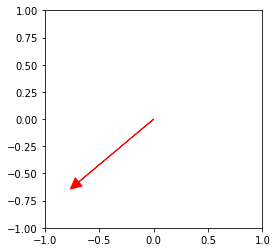

In [8]:
x_length,y_length = get_arrow_lengths(first_azimuth)

plt.arrow(0, 0, x_length, y_length,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='red')    
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>

Use the ```get_arrow_length``` function and add an green arrow pointed north (azimuth of 0) and an orange one pointed southeast (azimuth of 135) onto the plot above.

## Calculate the x length and y length associated with the unit vector of each azimuth

In [9]:
ice_directions['x_length'] = np.zeros(len(ice_directions))
ice_directions['y_length'] = np.zeros(len(ice_directions))

ice_directions['x_length'],ice_directions['y_length'] = get_arrow_lengths(ice_directions['Azimuth'])
ice_directions.head()

,Feature,Sense,NTS_250k,NTS_50k,Datum,Projection,Long,Lat,Azimuth,Timing,...,src_Year,src_Title,src_Org,src_Series,src_Pub_no,src_Scale,src_Type,src_Ref,x_length,y_length
0,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.543547,48.336583,230,NaN,...,1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918",-0.766044,-0.642788
1,Drumlinoid or fluting,Bidirectional,092B,092B06,NAD 83,Geographic,-123.394746,48.371947,39,NaN,...,1995,Surficial materials of Canada,Geological Survey of Canada,A Series Map,1880A,5000000,e00,"Fulton, 1995",0.629320,0.777146
2,Striation,Unidirectional,092B,092B05,NAD 83,Geographic,-123.507599,48.382182,190,NaN,...,1918,"Sooke sheet, Vancouver Island, British Columbia",Geological Survey of Canada,A Series Map,44A,125000,hardcopy,"Chapman et al., 1918",-0.173648,-0.984808
3,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.494612,48.396594,188,NaN,...,1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993",-0.139173,-0.990268
4,Striation,Unidirectional,092B,092B06,NAD 83,Geographic,-123.496605,48.400974,202,NaN,...,1993,Surficial geology of the Victoria area (NTS 92...,"BC Ministry of Energy, Mines and Petroleum Res...",Open File,1993-23,50000,hardcopy,"Blyth and Rutter, 1993",-0.374607,-0.927184


## Plot the data on a map

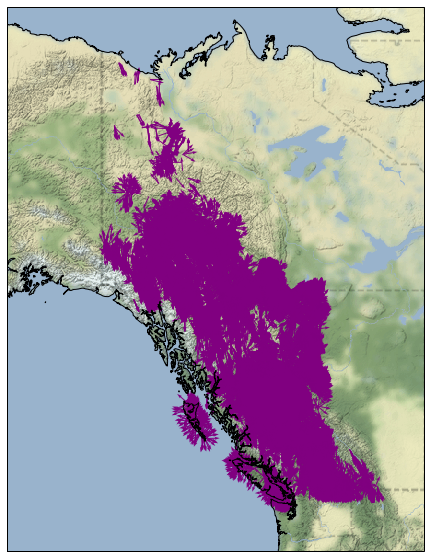

In [10]:
from cartopy.io.img_tiles import Stamen

plt.figure(figsize=(12,10))
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-150, -110, 45, 70])
ax.add_image(tiler, 4)
ax.coastlines('10m')

plt.quiver(np.array(ice_directions['Long']),np.array(ice_directions['Lat']),
           np.array(ice_directions['x_length']),np.array(ice_directions['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='purple')
plt.show()

## Subsample the data

It is awesome that there are so many datapoints, but it makes it hard to see what the directions are. Let's take a subsample of the data:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

We can use the pandas function ```.sample``` to do so specifying how many samples. In this case, we will want ```replace=False``` so that we don't sample the same datapoint twice.

Let's grab 1000 samples and plot them. We could be even more clever and develop a function that sampled with spatial awareness, but for now, let's sample 1000 data points and then plot them on the same map.

In [11]:
ice_directions_subsample = ice_directions.sample(1000, replace=False)

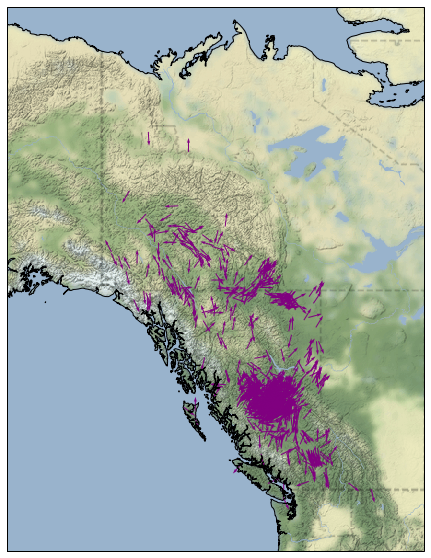

In [12]:
plt.figure(figsize=(12,10))
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-150, -110, 45, 70])
ax.add_image(tiler, 4)
ax.coastlines('10m')

plt.quiver(np.array(ice_directions_subsample['Long']),np.array(ice_directions_subsample['Lat']),
           np.array(ice_directions_subsample['x_length']),np.array(ice_directions_subsample['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='purple')
plt.show()

Another way to visualize all these data on a map would be to change their color based on direction.

<font color=goldenrod>**_Code for you to write_**</font>

Make a data frame called ```ice_directions_west``` for flow directions that have an 'Azimuth' greater than 180 and a data frame called ```ice_directions_east``` for flow directions that have an 'Azimuth' less than 180.

NameError: name 'ice_directions_west' is not defined

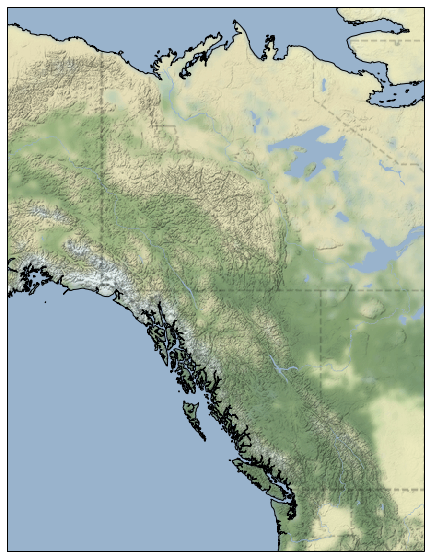

In [13]:
plt.figure(figsize=(12,10))
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-150, -110, 45, 70])
ax.add_image(tiler, 4)
ax.coastlines('10m')

plt.quiver(np.array(ice_directions_west['Long']),np.array(ice_directions_west['Lat']),
           np.array(ice_directions_west['x_length']),np.array(ice_directions_west['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='red',alpha=0.1)
plt.quiver(np.array(ice_directions_east['Long']),np.array(ice_directions_east['Lat']),
           np.array(ice_directions_east['x_length']),np.array(ice_directions_east['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='blue',alpha=0.1)

plt.show()

It is easier to see some of the directions, but it would be nice to summarize there orientation. We have summarized data using histograms before so let's go ahead and do that.

## Visualizing the directions

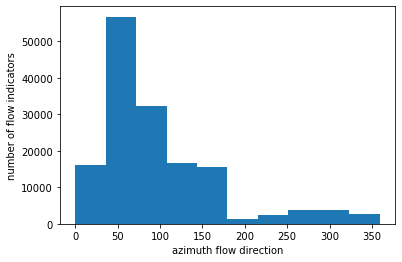

In [14]:
plt.hist(ice_directions['Azimuth'])
plt.xlabel('azimuth flow direction')
plt.ylabel('number of flow indicators')
plt.show()

**Why are histograms not great for visualizing such data?**

### Rose diagrams

*Text modified from Lisa Tauxe's materials for her Python for Earth Science Students course: https://github.com/ltauxe/Python-for-Earth-Science-Students*

As Earth scientists, we like to make plots that convey the most information with the least amount of effort for the viewer.  2D directional data are much better represented as 'rose diagrams', which are really just histograms plotted around a circle. They are also known as _polar_ projections as they could be used to make a map of the Earth looking down at one of the poles.  

We will follow these steps: 

- For rose diagrams, we will create a  plot instance (called ```fig```) with the ```plt.subplot( )``` function.  We make it a _polar_ plot by setting the ```polar``` keyword to ```True```. 
- The _polar_ type of subplot has funny coordinates set as default, funny to an Earth scientist at least.  The orientations go around counterclockwise instead of clockwise (like map directions). To make it seem more normal for Earth science data,  we have to switch around the directions to geographic coordinates.  We do this with the **fig.set_theta_direction(-1)** function where the '-1' tells **matplotlib** that we want the numbers to go around clockwise, instead of the default (which for some unknown reason goes counter clockwise).  
- We also have to put '0' at the top of the diagram (because it is 'North' in Earth science).  We do that with the ```fig.set_theta_zero_location('N')``` call, which tells ```matplotlib``` to put 0 on top (instead of on the right side which is the default).  
-  We have to define some bins, sort of like histograms but around azimuthal circle, and count up how many directions are in each bin.  We will use a bin size of 10$^{\circ}$.  Fortunately, ```plt.hist( )``` will count up the number of directional data in each bin for us! Usually we just use ```plt.hist()``` to make the plot, but we can also have it return the bins and the number in each bin.
- We will use the  plot function **plt.bar( )** which normally makes bar charts, but will make rose diagrams if the plot is _polar_.
- Finally, we will plot the data on the figure instance. 

Let's start with **plt.hist( )** to count up the number in each bin for each set of striations. 

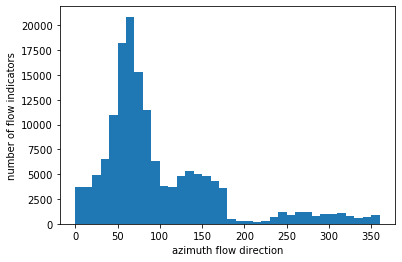

In [15]:
width = 10 # width of the azimuthal bins
binarray = np.arange(0,360+width,width) # make an array to use for bins in plt.hist
azimuth_counts, azimuth_bins, patches = plt.hist(ice_directions['Azimuth'],bins=binarray) # get back the counts
plt.xlabel('azimuth flow direction')
plt.ylabel('number of flow indicators')
plt.show()

A few more things.  **plt.bar( )** needs an array of widths that is same same length as our count arrays but with the width (in radians) and also the bin arrays have to be in radians too!  So we need to delete the last bin from binarray and make arrays in radians.

So, to finish things off:  




In [16]:
bins = binarray[0:-1] # delete the last bin
thetas = np.radians(bins) # convert the binarray to radians.  
widths = np.radians(np.ones(len(thetas))*width) # make the widths array

Now we are ready to make the plot.  

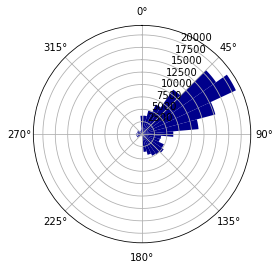

In [17]:
# make the figure instance
fig = plt.subplot(111, polar=True) # Specify polar axes
# set the coordinates the way we want them
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# use the polar "bar" plot.   
fig.bar(thetas, azimuth_counts, width=widths, bottom=0, color='darkblue')
plt.show()

In and of itself, this result is super cool. The Cordilleran ice sheet was dominantly flowing to the NW towards the Laurentide ice sheet.

<img src="./images/Cordilleran-and-Laurentide-Ice-Sheets.png" width = 600>

But the Cordilleran ice sheet ice sheet is more complicated than that and has zones with different dynamics. Let's zoom-in on Vancouver Island -- west of Vancouver where the lovely coastal city of Victoria is located.

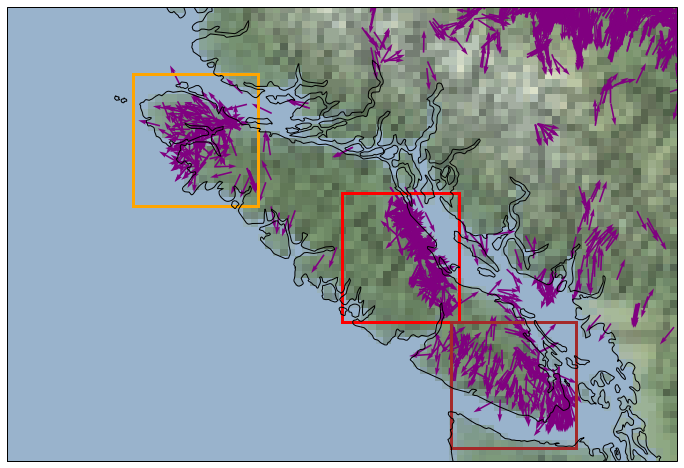

In [18]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,10))
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-130, -122, 48, 51.5])
ax.add_image(tiler, 4)
ax.coastlines('10m')

plt.quiver(np.array(ice_directions['Long']),np.array(ice_directions['Lat']),
           np.array(ice_directions['x_length']),np.array(ice_directions['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='purple')

ax.add_patch(mpatches.Rectangle(xy=[-128.5, 50], width=1.5, height=1,
                                    edgecolor='orange',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-126, 49.1], width=1.4, height=1,
                                    edgecolor='red',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))

ax.add_patch(mpatches.Rectangle(xy=[-124.7, 48.1], width=1.5, height=1,
                                    edgecolor='brown',facecolor='none',
                                    linewidth=3,
                                    transform=ccrs.Geodetic()))
                      
plt.show()

In the map above, I have grouped the data into three zones (north, central and south). Let's filter the dataframe to make separate Vancouver Island north, central and south dataframes.

In [19]:
ice_directions_VI_n = ice_directions[(ice_directions['Long'] < -127.0) & 
                                     (ice_directions['Long'] > -128.5) &
                                     (ice_directions['Lat'] < 51.0) &
                                     (ice_directions['Lat'] > 50.0)]

ice_directions_VI_c = ice_directions[(ice_directions['Long'] < -124.6) & 
                                     (ice_directions['Long'] > -126.0) &
                                     (ice_directions['Lat'] < 50.1) &
                                     (ice_directions['Lat'] > 49.1)]

ice_directions_VI_s = ice_directions[(ice_directions['Long'] < -123.2) & 
                                     (ice_directions['Long'] > -124.7) &
                                     (ice_directions['Lat'] < 49.1) &
                                     (ice_directions['Lat'] > 48.1)]

Let's plot them different colors so that we make sure the filtering worked. 

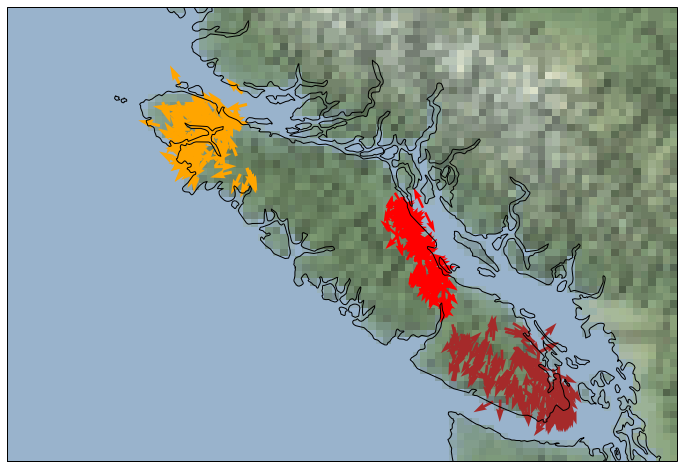

In [20]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,10))
tiler = Stamen('terrain-background')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent([-130, -122, 48, 51.5])
ax.add_image(tiler, 4)
ax.coastlines('10m')

plt.quiver(np.array(ice_directions_VI_n['Long']),np.array(ice_directions_VI_n['Lat']),
           np.array(ice_directions_VI_n['x_length']),np.array(ice_directions_VI_n['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='orange')

plt.quiver(np.array(ice_directions_VI_c['Long']),np.array(ice_directions_VI_c['Lat']),
           np.array(ice_directions_VI_c['x_length']),np.array(ice_directions_VI_c['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='red')

plt.quiver(np.array(ice_directions_VI_s['Long']),np.array(ice_directions_VI_s['Lat']),
           np.array(ice_directions_VI_s['x_length']),np.array(ice_directions_VI_s['y_length']),
           scale=30,transform=ccrs.PlateCarree(),color='brown')
                      
plt.show()

In [21]:
def make_rose_diagram(azimuths,color='black',bin_width=10,title='',mean_direction=None):
    binarray = np.arange(0,360+bin_width,bin_width) # make an array to use for bins in plt.hist
    azimuth_counts, azimuth_bins, patches = plt.hist(azimuths,bins=binarray) # get back the counts
    plt.clf()
    bins = binarray[0:-1] # delete the last bin
    thetas = np.radians(bins) # convert the binarray to radians.  
    widths = np.radians(np.ones(len(thetas))*bin_width) # make the widths array

    fig = plt.subplot(111, polar=True) # Specify polar axes
    fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
    fig.set_theta_zero_location("N") # Specify 0-degrees as North
    plt.bar(thetas, azimuth_counts, width=widths, bottom=0, color=color)
    if mean_direction != None:
        plt.bar(np.radians(mean_direction), np.max(azimuth_counts), width=0.01,bottom=0, color='black')
    plt.title(title)
    plt.show()

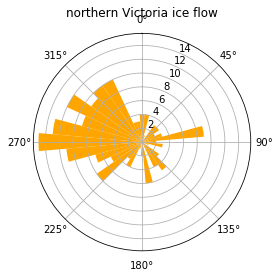

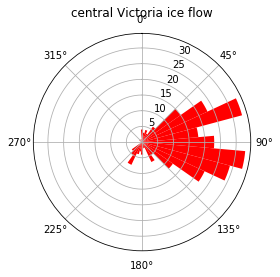

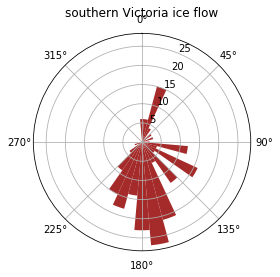

In [22]:
make_rose_diagram(ice_directions_VI_n['Azimuth'],color='orange',title='northern Victoria ice flow')
make_rose_diagram(ice_directions_VI_c['Azimuth'],color='red',title='central Victoria ice flow')
make_rose_diagram(ice_directions_VI_s['Azimuth'],color='brown',title='southern Victoria ice flow')

### Are the central directions 180º away from the north directions?

To calculate a mean direction of directional data, we can't just calculate the arithmetic mean.

In [23]:
azimuth_1 = 6
azimuth_2 = 351

np.mean([azimuth_1,azimuth_2])

178.5

That is a pretty bogus answer as both of these azimuths are pointed north.

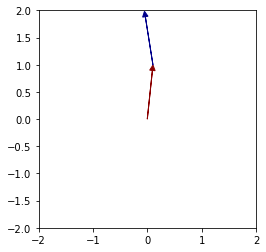

In [24]:
x_length_1,y_length_1 = get_arrow_lengths(azimuth_1)
x_length_2,y_length_2 = get_arrow_lengths(azimuth_2)

plt.arrow(0, 0, x_length_1, y_length_1,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='darkred')   
plt.arrow(x_length_1, y_length_1,x_length_2,y_length_2,length_includes_head=True,
         head_width=0.1, head_length=0.1,color='darkblue')   
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

So how do we actually get the mean azimuth direction?

<img src="./images/resultant_vector.png" width = 300>

We can calculate the x_total and y_total as we have previously calculated the x_length and y_length for every data point:

In [25]:
x_total_VI_n = np.sum(ice_directions_VI_n['x_length'])
y_total_VI_n = np.sum(ice_directions_VI_n['y_length'])
print(x_total_VI_n,y_total_VI_n)

-64.33078653746497 23.783471333231315


I will draw this on the board and we can see how we can put arctangent to use. And define a function to calculate the mean angular direction.

In [26]:
def mean_angular_direction(x_total,y_total):
    if (x_total > 0) & (y_total > 0):
        angle = np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total > 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total < 0):
        angle = 180+np.rad2deg(np.arctan(x_total/y_total))
    elif (x_total < 0) & (y_total > 0):
        angle = 360+np.rad2deg(np.arctan(x_total/y_total))
    return(angle)

In [27]:
northern_mean = mean_angular_direction(x_total_VI_n,y_total_VI_n)

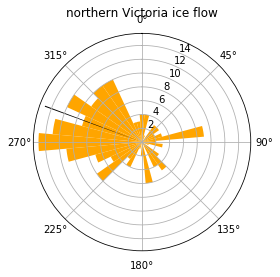

In [28]:
make_rose_diagram(ice_directions_VI_n['Azimuth'],color='orange',title='northern Victoria ice flow',mean_direction=northern_mean)

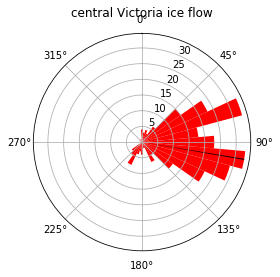

In [29]:
x_total_VI_c = np.sum(ice_directions_VI_c['x_length'])
y_total_VI_c = np.sum(ice_directions_VI_c['y_length'])
central_mean = mean_angular_direction(x_total_VI_c,y_total_VI_c)
make_rose_diagram(ice_directions_VI_c['Azimuth'],color='red',title='central Victoria ice flow',mean_direction=central_mean)

## Are the central Victoria and northern Victoria ice flow directions antiparallel to one another?

In [30]:
print(northern_mean)

290.2896506801923


In [31]:
print(central_mean+180)

279.6137208886106


In [32]:
central_mean+180 == northern_mean

False

### How well do we know the mean directions? 

But there is scatter in the data. How well do we know the mean directions? 

If we were assuming a distribution, we could calculate a confidence interval (a standard deviation for example), but we don't know what the distribution can be. We can use the data set itself as an approximation of the population and resampling from it using a statistical technique called **the bootstrap** calculating the mean each time.

> The Bootstrap: Resampling from the Sample 

> What we do have is a large random sample from the population. As we know, a large random sample is likely to resemble the population from which it is drawn. This observation allows data scientists to lift themselves up by their own bootstraps: the sampling procedure can be replicated by sampling from the sample.

> Here are the steps of the bootstrap method for generating another random sample that resembles the population:
> - Treat the original sample as if it were the population.
> - Draw from the sample, at random with replacement, the same number of times as the original sample size.

> It is important to resample the same number of times as the original sample size. The reason is that the variability of an estimate depends on the size of the sample. Since our original sample consisted of 500 employees, our sample median was based on 500 values. To see how different the sample could have been, we have to compare it to the median of other samples of size 500.

> If we drew 500 times at random without replacement from our sample of size 500, we would just get the same sample back. By drawing with replacement, we create the possibility for the new samples to be different from the original.

> Why is this a good idea? By the law of averages, the distribution of the original sample is likely to resemble the population, and the distributions of all the "resamples" are likely to resemble the original sample. So the distributions of all the resamples are likely to resemble the population as well.

> Source: https://www.inferentialthinking.com/chapters/13/2/Bootstrap.html

In [33]:
central_mean_angles = []

for n in range(0,10000):
    resampled = ice_directions_VI_c.sample(n=len(ice_directions_VI_c),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    central_mean_angles.append(mean_angle+180)

In [34]:
north_mean_angles = []

for n in range(0,10000):
    resampled = ice_directions_VI_n.sample(n=len(ice_directions_VI_n),replace=True)
    x_total = np.sum(resampled['x_length'])
    y_total = np.sum(resampled['y_length'])
    mean_angle = mean_angular_direction(x_total,y_total)
    north_mean_angles.append(mean_angle)

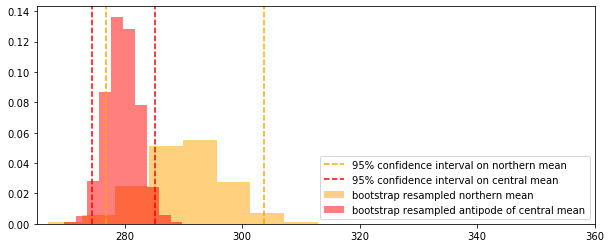

In [35]:
plt.figure(figsize=(10,4))
plt.hist(north_mean_angles,alpha=0.5,density=True,color='orange',label='bootstrap resampled northern mean')
plt.hist(central_mean_angles,alpha=0.5,density=True,color='red',label='bootstrap resampled antipode of central mean')
plt.axvline(x=np.percentile(north_mean_angles,2.5),linestyle='--',color='orange',label='95% confidence interval on northern mean')
plt.axvline(x=np.percentile(north_mean_angles,97.5),linestyle='--',color='orange')
plt.axvline(x=np.percentile(central_mean_angles,2.5),linestyle='--',color='red',label='95% confidence interval on central mean')
plt.axvline(x=np.percentile(central_mean_angles,97.5),linestyle='--',color='red')
plt.legend(loc='lower right')
plt.xlim(265, 360)
plt.show()

Can we say that the northern mean and the antipode of the central mean are distinct?

**write your answer here and explain why**